THIS NOTEBOOK CONTAINS RESULT OF TASK 1 WITHOUT INDEPENDENT T-TEST REST ALL OF THING IS COVERED TRY TO LEARN SOMETHING OR IF YOU KNOW SOMETHING BETTER PLZ COMMENT I WELCOME ALL OF YOU TO CONTRIBUTE AND HELP ME TO DO MORE PROGRESS.

THANKS 

HERE IS THE LINK OF TASK 2 RESULT PLZ CHECK OUT:https://www.kaggle.com/code/randhirasdataanalyst/quantium-chips-analysis-task2


                                                            TASK 1 
                                                       AIM OF ANALYSIS

To get started, download the resource csv data files below and begin performing high-level data checks such as:

Creating and interpreting high-level summaries of the data
Finding outliers and removing these (if applicable)
Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember, our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.



In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [254]:
excel_file=pd.read_csv('/kaggle/input/quantium-data-analytics-virtual-experience-program/Transactions.csv')
excel_file

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [255]:
csv_file=pd.read_csv("/kaggle/input/quantium-data-analytics-virtual-experience-program/PurchaseBehaviour.csv")
csv_file

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [256]:
# joining them on LYLTY_CARD_NBR and create a new dataframe out of them for futher process
df=excel_file.join(csv_file.set_index('LYLTY_CARD_NBR'),on='LYLTY_CARD_NBR')
df.sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
131913,43451,217,217315,217694,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,OLDER SINGLES/COUPLES,Premium
125962,43362,122,122074,125085,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,OLDER SINGLES/COUPLES,Premium
17745,43449,23,23030,18927,43,Smith Crinkle Cut Bolognese 150g,2,5.2,MIDAGE SINGLES/COUPLES,Premium
11690,43460,148,148193,147885,89,Kettle Sweet Chilli And Sour Cream 175g,1,5.4,MIDAGE SINGLES/COUPLES,Mainstream
237801,43603,33,33115,30178,70,Tyrrells Crisps Lightly Salted 165g,1,4.2,YOUNG SINGLES/COUPLES,Mainstream


In [257]:
# copy the dataset to prevent data loss
df1=df.copy()
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [258]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [259]:
df1.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [260]:
df1.sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
83360,43472,34,34354,31576,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,OLDER SINGLES/COUPLES,Budget
234830,43388,184,184174,187374,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,YOUNG SINGLES/COUPLES,Budget
46722,43424,164,164027,163948,71,Twisties Cheese Burger 250g,2,8.6,OLDER FAMILIES,Budget
15530,43343,232,232242,236605,106,Natural ChipCo Hony Soy Chckn175g,2,6.0,MIDAGE SINGLES/COUPLES,Mainstream
197369,43541,172,172167,173776,18,Cheetos Chs & Bacon Balls 190g,2,6.6,YOUNG FAMILIES,Budget


In [261]:
# converting date column of excel format to datetime format for future use
df1['DATE']=pd.to_datetime(df1['DATE'],origin='1899-12-30',unit='D')


In [262]:
df1['DATE']


0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [263]:
df1.sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
233682,2018-10-16,147,147162,146694,75,Cobs Popd Sea Salt Chips 110g,2,7.6,YOUNG SINGLES/COUPLES,Budget
99140,2019-05-18,45,45118,41078,29,French Fries Potato Chips 175g,1,3.0,OLDER SINGLES/COUPLES,Mainstream
213907,2019-03-17,208,208132,206866,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,YOUNG FAMILIES,Mainstream
79015,2019-06-12,227,227180,229363,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,OLDER FAMILIES,Premium
30301,2019-01-01,250,250338,252846,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,NEW FAMILIES,Mainstream


<Axes: >

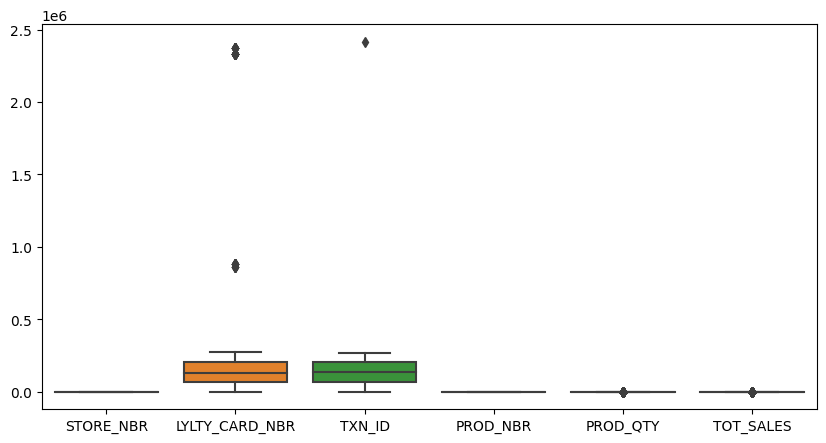

In [264]:
# checking outliers using boxplot visualization method for quick referance
plt.figure(figsize=(10,5))
sns.boxplot(df1)


IGNORING THE OUTLIERS OF LYLTY_CARD_NBR AND TXN_ID BECAUSE THEY ARE USE FOR CUSTOMER AND TRANSACTION IDENTIFICATION ID BUT IN PROD_QTY AND TOT_SALES HAVE ONE-ONE OUTLIERS EACH LET'S CHECK THEM MORE BREFILY.

<Axes: >

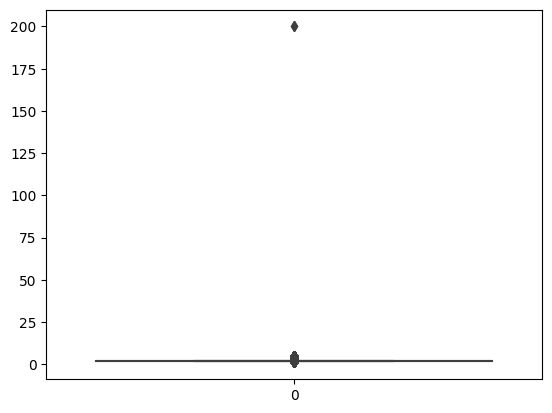

In [265]:
sns.boxplot(df1['PROD_QTY'])

IN PROD_QTY column we got 200 quantity order. let's find it


In [266]:
df1[df1['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


<Axes: >

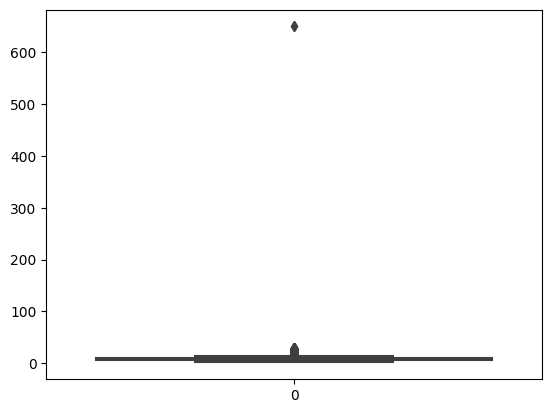

In [267]:
sns.boxplot(df1['TOT_SALES'])


IN TOT_SALES COLUMN WE GOT MORE THAN 600 AS TOTAL SALES WHICH IS OUTLIER FOR IT.LET'S FIGURE OUT WHAT WE GET BY SEEING IT MORE DEEPLY


In [268]:
df1[df1['TOT_SALES']>600]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


PROD_QTY AND TOT_SALES OUTLIERS ARE CAUSE OF SAME CUSTOMER WHO IS PREMIUM CUSTOMER AND BROUGHT DARITO CORN CHP SUPEREME 380G FROM SAME STORE_NBR(226) ON TWO DIFFERENT DATES '2018-08-19' AND '2019-05-20' AND THE QUANTITY HE/SHE BROUGHT IS 200 AND TOT_SALES OF 650.


In [269]:
# REMOVING OUTLIERS FROM DATASET
df1.drop(index=[69762,69763],inplace=True)

In [270]:
df1.shape # output (264834,10) new shape after removing outlier.(264836,10) shape of dataframe before removing outliers

(264834, 10)

                        let's derive extra features such as pack size and brand name from the data 

In [271]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [272]:
# create a new column name BRAND and add it to dataset to this i am using regex method
df1['BRAND']=df1['PROD_NAME'].str.extract(r'(\b[A-Z][a-zA-Z]*\b)')
df1['BRAND']

0          Natural
1              CCs
2           Smiths
3           Smiths
4           Kettle
            ...   
264831      Kettle
264832    Tostitos
264833     Doritos
264834     Doritos
264835    Tostitos
Name: BRAND, Length: 264834, dtype: object

In [273]:
df1['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

After extraction of BRAND from PROD_NAME we found that there are some brands with thier different name in dataset but they are same so let's make them together for better analysis. 

In [274]:
df1['BRAND']=df1['BRAND'].replace({
    'RRD':'Red',
    'NCC':'Natural',
    'Dorito':'Doritos',
    'WW':'Woolworths',
    'Grain':'GrnWves',
    'Infzns':'Infuzions',
    'Snbts':'Sunbites',
    'Smith':'Smiths'    
})

In [275]:
#extracting pack size from PROD_NAME using regex method
df1['PKT_SIZE']=df1['PROD_NAME'].str.extract(r'(\d+[gG])')
df1['PKT_SIZE'].value_counts()

PKT_SIZE
175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6416
270g     6285
200g     4473
135g     3257
250g     3169
210g     3167
210G     3105
90g      3008
190g     2995
160g     2970
220g     1564
70g      1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: count, dtype: int64

In [276]:
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PKT_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,150g
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,Kettle,175g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,Tostitos,175g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,Doritos,170g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,Doritos,150g


In [277]:
df1['PROD_NAME'].unique()


array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

To draw insights on who spends on chips and what drives spends for each customer segment.first we have to find all chips products from our dataset as it contain cheese,cream and many more items.

In [278]:
from collections import Counter 
count=Counter()
for x in df1['PROD_NAME'].str.split(" "):
    for counter in x:
        count[counter]+=1
count



Counter({'': 504830,
         '175g': 60561,
         'Chips': 49770,
         '150g': 41633,
         'Kettle': 41288,
         '&': 35565,
         'Smiths': 28860,
         'Salt': 27976,
         'Cheese': 27890,
         'Pringles': 25102,
         '134g': 25102,
         'Doritos': 24962,
         'Crinkle': 23960,
         '110g': 22387,
         'Corn': 22061,
         'Original': 21560,
         'Cut': 20754,
         'Chip': 18645,
         '170g': 18502,
         'Salsa': 18094,
         'Chicken': 15407,
         '165g': 15297,
         'Sea': 14145,
         'Thins': 14075,
         'Sour': 13882,
         'Crisps': 12607,
         '330g': 12540,
         'Vinegar': 12402,
         'Chilli': 12389,
         '300g': 12041,
         'RRD': 11894,
         'Infuzions': 11057,
         'Supreme': 10961,
         'WW': 10320,
         'Cobs': 9693,
         'Popd': 9693,
         'Tortilla': 9580,
         'Tostitos': 9471,
         'Twisties': 9454,
         'Sensations': 9429

In [279]:
# To do this we can extract all those PROD_NAME who contain word chips,chp,chip and etc.  r'\bChips\b|\bChip\b|\bChp\b'
filter=df1[df1['PROD_NAME'].str.contains(r'Chips|Chip|Chp')]

In [280]:
filter

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PKT_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,150g
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,Smiths,330g
...,...,...,...,...,...,...,...,...,...,...,...,...
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,YOUNG SINGLES/COUPLES,Premium,Cobs,110g
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,YOUNG SINGLES/COUPLES,Premium,Kettle,150g
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,YOUNG SINGLES/COUPLES,Premium,Cobs,110g
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,YOUNG SINGLES/COUPLES,Premium,Thins,175g


                                                            CHIPS ANALYSIS 

        SALES ANALYSIS
        

In [281]:
filter.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,87333,87333.000000,8.733300e+04,87333.000000,87333.000000,87333.000000,87333.000000
mean,2018-12-29 21:05:59.740304384,135.523113,1.360219e+05,135602.492288,49.950672,1.906084,7.271701
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000
25%,2018-09-30 00:00:00,70.000000,7.010000e+04,68056.000000,16.000000,2.000000,6.000000
50%,2018-12-29 00:00:00,131.000000,1.314810e+05,135821.000000,42.000000,2.000000,6.600000
75%,2019-03-31 00:00:00,203.000000,2.032820e+05,203477.000000,78.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,270209.000000,111.000000,5.000000,29.500000
std,NaN,76.853132,8.095112e+04,78071.088807,34.449796,0.341078,2.468679


In [282]:
filter.PREMIUM_CUSTOMER.value_counts()

PREMIUM_CUSTOMER
Mainstream    33671
Budget        30772
Premium       22890
Name: count, dtype: int64

In [283]:
filter.LIFESTAGE.value_counts()


LIFESTAGE
OLDER SINGLES/COUPLES     18043
RETIREES                  16363
OLDER FAMILIES            15894
YOUNG FAMILIES            14391
YOUNG SINGLES/COUPLES     12026
MIDAGE SINGLES/COUPLES     8335
NEW FAMILIES               2281
Name: count, dtype: int64

Text(0.5, 1.0, 'TOTAL SALES BY PREMIUM CUSTOMERS')

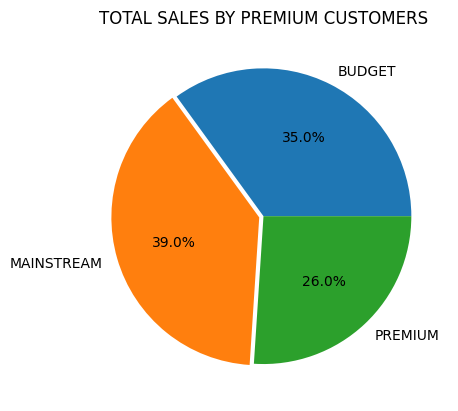

In [284]:
#TOTAL SALES BY PREIMUM CUSTOMERS
total_sales_by_premium_customer=filter.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
total_sales_by_premium_customer
plt.pie(total_sales_by_premium_customer,labels=['BUDGET','MAINSTREAM','PREMIUM'],explode=[0,0.03,0],autopct='%1.1f%%')
plt.title('TOTAL SALES BY PREMIUM CUSTOMERS')

In [285]:
#how sales vary for premium_customer
avg_sales_by_premium_customer=filter.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].mean()
median_sale_by_premium_customer=filter.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].median()


Text(0, 0.5, 'TOTAL SALES')

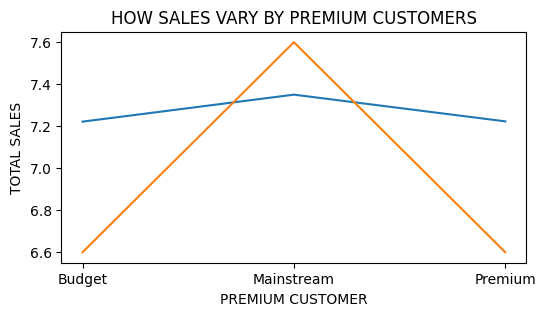

In [286]:
plt.figure(figsize=(6,3))
a=sns.lineplot(avg_sales_by_premium_customer)
b=sns.lineplot(median_sale_by_premium_customer)
plt.title('HOW SALES VARY BY PREMIUM CUSTOMERS')
plt.xlabel('PREMIUM CUSTOMER')
plt.ylabel('TOTAL SALES')

In [287]:
#TOTAL SALES BY DIFFERENT LIFESTAGE
sales_by_lifestage=filter.groupby(['LIFESTAGE'])['TOT_SALES'].sum()
sales_by_lifestage

LIFESTAGE
MIDAGE SINGLES/COUPLES     61000.20
NEW FAMILIES               16457.55
OLDER FAMILIES            115369.60
OLDER SINGLES/COUPLES     132464.35
RETIREES                  119553.70
YOUNG FAMILIES            104437.90
YOUNG SINGLES/COUPLES      85776.20
Name: TOT_SALES, dtype: float64

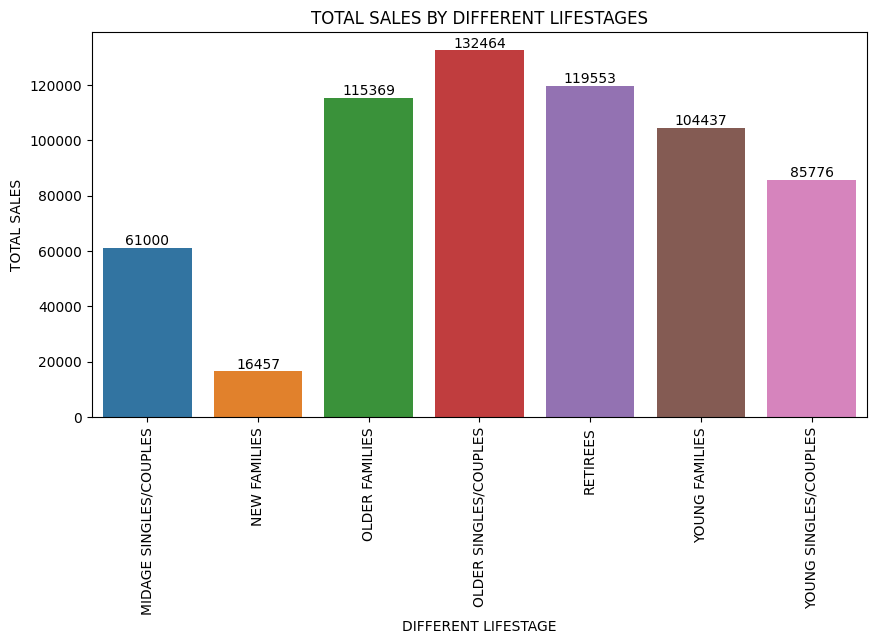

In [288]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax=sns.barplot(x=sales_by_lifestage.index,y=sales_by_lifestage.values)
plt.xlabel('DIFFERENT LIFESTAGE')
plt.ylabel('TOTAL SALES')
plt.title('TOTAL SALES BY DIFFERENT LIFESTAGES')
for a in ax.containers:
    ax.bar_label(a,fmt='%d')


In [289]:
#TOTAL SALES BY PREMIUM CUSTOMER AND LIFESTAGE
total_sales=filter.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].sum()
total_sales.sort_values(ascending=False)

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            54808.85
Mainstream        YOUNG SINGLES/COUPLES     51434.40
                  RETIREES                  50673.45
Budget            YOUNG FAMILIES            45626.85
                  OLDER SINGLES/COUPLES     44910.30
Mainstream        OLDER SINGLES/COUPLES     44114.10
Premium           OLDER SINGLES/COUPLES     43439.95
Budget            RETIREES                  37417.30
Mainstream        OLDER FAMILIES            34709.75
Premium           RETIREES                  31462.95
Mainstream        YOUNG FAMILIES            30941.65
                  MIDAGE SINGLES/COUPLES    29978.75
Premium           YOUNG FAMILIES            27869.40
                  OLDER FAMILIES            25851.00
Budget            YOUNG SINGLES/COUPLES     20277.40
Premium           MIDAGE SINGLES/COUPLES    18930.65
                  YOUNG SINGLES/COUPLES     14064.40
Budget            MIDAGE SINGLES/COUPLES    12090.80
     

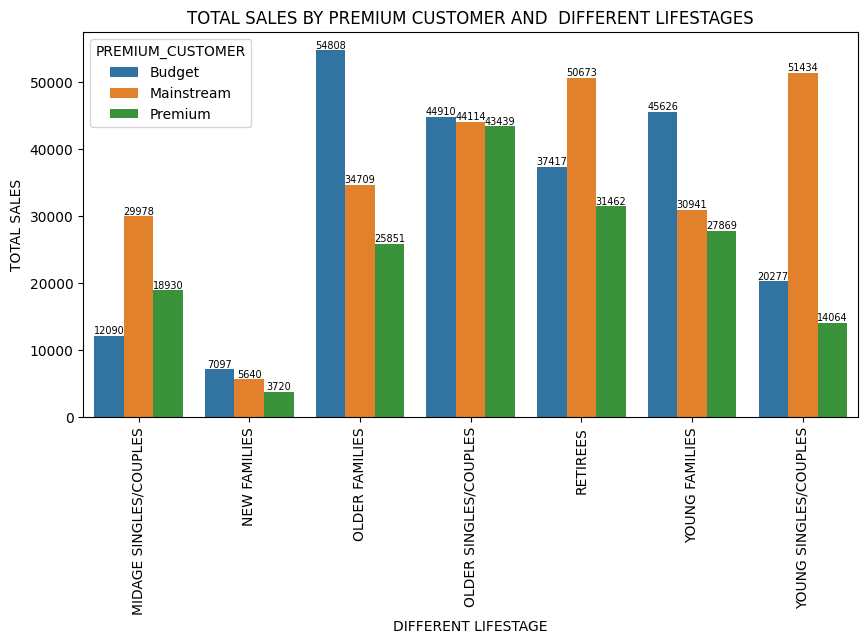

In [290]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax=sns.barplot(x=total_sales.index.get_level_values('LIFESTAGE'),
              y=total_sales.values,
              hue=total_sales.index.get_level_values('PREMIUM_CUSTOMER'))
plt.xlabel('DIFFERENT LIFESTAGE')
plt.ylabel('TOTAL SALES')
plt.title('TOTAL SALES BY PREMIUM CUSTOMER AND  DIFFERENT LIFESTAGES')
for a in ax.containers:
    ax.bar_label(a,fmt='%d',fontsize=7)


CONCLUSION OF SALES ANALYSIS:

BY ANALYZE ALL FACTOR WE FOUND THAT IN PREMIUM_CUSTOMER MOST SALES ARE DONE BY MAINSTREAM SEGEMENT AND BUDGET SEGMENT AND IN LIFESTAGES MOSTLY OLDER SINGLES/COUPLES FOLLOWED BY RETIREES PRODUCE MOST SALES.WHEN WE COMBINE THEM (PREMIUM_CUSTOMER AND LIFESTAGE) WE FOUND THAT MOSTLY SALES ARE DUE TO BUDGET (OLDER FAMILIES), MAINSTREAM (YOUNG SINGLES/COUPLES,RETIREES),PREMIUM (OLDER SINGLES/COUPLES).
             
The region behind of high sales in these segement  may be of more number of customer in these segement or more number of quantity they         purchased let's find out.


        QUANTITY ANALYSIS
        

In [291]:
# TOTAL NUMBER OF QUANTITY ORDER BY PREMIUM CUSTOMERS
quantity_premium_customer=filter.groupby(['PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
quantity_premium_customer

PREMIUM_CUSTOMER
Budget        58728
Mainstream    64120
Premium       43616
Name: PROD_QTY, dtype: int64

In [292]:
# TOTAL NUMBER OF QUANTITY ORDER BY LIFESTAGE
quantity_lifestage=filter.groupby(['LIFESTAGE'])['PROD_QTY'].sum()
quantity_lifestage.sort_values(ascending=False)

LIFESTAGE
OLDER SINGLES/COUPLES     34507
OLDER FAMILIES            30967
RETIREES                  30904
YOUNG FAMILIES            27889
YOUNG SINGLES/COUPLES     22087
MIDAGE SINGLES/COUPLES    15874
NEW FAMILIES               4236
Name: PROD_QTY, dtype: int64

In [293]:
quantity_premium_lifestage=filter.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['PROD_QTY'].sum()
quantity_premium_lifestage.sort_values(ascending=False)

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            14673
Mainstream        RETIREES                  13218
                  YOUNG SINGLES/COUPLES     12703
Budget            YOUNG FAMILIES            12163
                  OLDER SINGLES/COUPLES     11651
Mainstream        OLDER SINGLES/COUPLES     11582
Premium           OLDER SINGLES/COUPLES     11274
Budget            RETIREES                   9620
Mainstream        OLDER FAMILIES             9286
                  YOUNG FAMILIES             8300
Premium           RETIREES                   8066
Mainstream        MIDAGE SINGLES/COUPLES     7592
Premium           YOUNG FAMILIES             7426
                  OLDER FAMILIES             7008
Budget            YOUNG SINGLES/COUPLES      5546
Premium           MIDAGE SINGLES/COUPLES     5042
                  YOUNG SINGLES/COUPLES      3838
Budget            MIDAGE SINGLES/COUPLES     3240
                  NEW FAMILIES               1835
Mainstrea

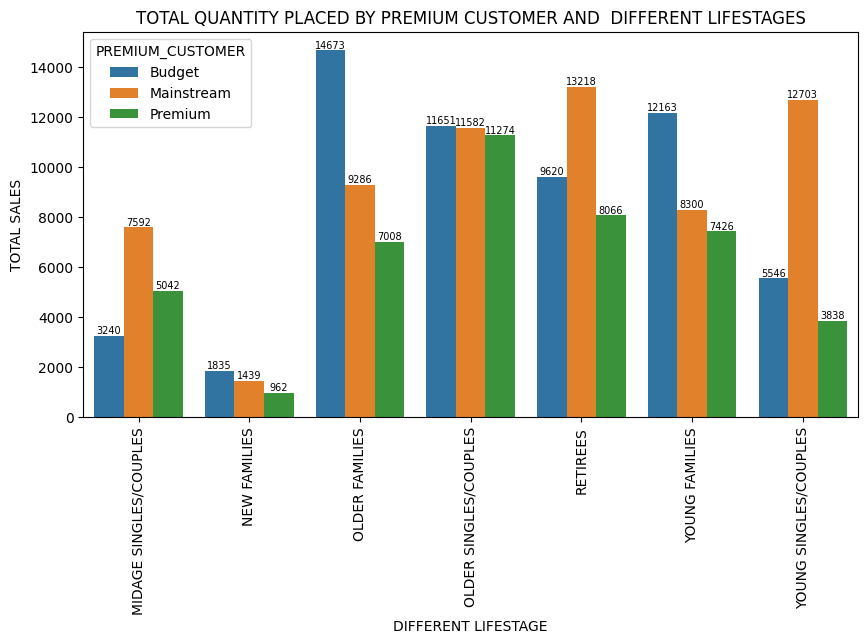

In [294]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax=sns.barplot(x=quantity_premium_lifestage.index.get_level_values('LIFESTAGE'),
              y=quantity_premium_lifestage.values,
              hue=quantity_premium_lifestage.index.get_level_values('PREMIUM_CUSTOMER'))
plt.xlabel('DIFFERENT LIFESTAGE')
plt.ylabel('TOTAL SALES')
plt.title('TOTAL QUANTITY PLACED BY PREMIUM CUSTOMER AND  DIFFERENT LIFESTAGES')
for a in ax.containers:
    ax.bar_label(a,fmt='%d',fontsize=7)


CONCLUSION OF QUANTITY ANALYSIS:

INDIVIUALLY IN PREMIUM_CUSTOMER MAINSTREAM QUANTITY ORDER IS MOST AND IN LIFESTAGE OLDER SINGLES/COUPLES,OLDER FAMILIES ORDER IN HIGH QUANTITY BUT WHEN WE COMBINE THEM WE FIGURE OUT THAT IN BUDGET SEGEMENT(OLDER FAMILIES,YOUNG FAMILIES),MAINSTREAM(RETIREES,YOUNG SINGLES/COUPLES) PLACED IN HIGH QUANTITY WHICH IS THE REASON OF HIGH SALES IN BUDGET,MAINSTREAM.

In [295]:
# FINDING NUMBER OF UNIT PER  CUSTOMER IN PREMIUM CUSTOMER AND LIFESTAGE FOR BETTER RESULT
customer=filter.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).agg(total_quantity=('PROD_QTY','sum'),
                                                              total_customer=('LYLTY_CARD_NBR','nunique'))
avg_customer=customer['total_quantity']/customer['total_customer']
avg_customer.sort_values(ascending=False)

PREMIUM_CUSTOMER  LIFESTAGE             
Mainstream        OLDER FAMILIES            4.394699
Budget            OLDER FAMILIES            4.323217
Premium           OLDER FAMILIES            4.281002
                  YOUNG FAMILIES            4.241005
Budget            YOUNG FAMILIES            4.205740
Mainstream        YOUNG FAMILIES            4.179255
                  OLDER SINGLES/COUPLES     3.468703
Premium           OLDER SINGLES/COUPLES     3.467856
Mainstream        MIDAGE SINGLES/COUPLES    3.438406
Budget            OLDER SINGLES/COUPLES     3.423744
                  MIDAGE SINGLES/COUPLES    3.347107
Premium           MIDAGE SINGLES/COUPLES    3.252903
Budget            RETIREES                  3.221701
Premium           RETIREES                  3.166863
Mainstream        RETIREES                  3.141906
Budget            NEW FAMILIES              2.810107
Mainstream        YOUNG SINGLES/COUPLES     2.806673
                  NEW FAMILIES              2.794175
Premi

CONCLUSION OF CUSTOMER VIEW:

BY ANALYSIS OF CUSTOMER FACTOR FOR SALES IN PREMIUM_CUSTOMER AND LIFESATGE WE FIND THAT THERE ARE MORE POPULATION IN OLDER FAMILIES AND YOUNG FAMILIES AS COMPARE TO OTHERS 


        BRAND AND PKT_SIZE ANALYSIS:
        

In [296]:
# BY WHICH PRODUCT BRANDS GENRATE MOST SALES.
filter.groupby(['BRAND','PROD_NAME'])['TOT_SALES'].sum().sort_values()

BRAND       PROD_NAME                               
Woolworths  WW D/Style Chip     Sea Salt 200g            5249.7
            WW Original Stacked Chips 160g               5323.8
            WW Sour Cream &OnionStacked Chips 160g       5323.8
            WW Original Corn    Chips 200g               5367.5
            WW Supreme Cheese   Corn Chips 200g          5390.3
French      French Fries Potato Chips 175g               7929.0
Smiths      Smiths Crinkle Cut  Chips Original 170g      8001.1
            Smiths Crinkle Cut  Chips Chs&Onion170g      8111.3
            Smiths Crinkle Cut  Chips Barbecue 170g      8125.8
            Smiths Crinkle Cut  Chips Chicken 170g       8183.8
            Smiths Chip Thinly  CutSalt/Vinegr175g       8196.0
Natural     Natural ChipCo      Hony Soy Chckn175g       8274.0
Smiths      Smiths Chip Thinly  S/Cream&Onion 175g       8313.0
Natural     Natural Chip        Compny SeaSalt175g       8331.0
            Natural ChipCo Sea  Salt & Vinegr 175g 

In [320]:
# which brand is purchased most
filter['BRAND'].value_counts()

BRAND
Doritos       19057
Smiths        16872
Thins         14075
Cobs           9693
Kettle         9580
Woolworths     7443
Natural        6050
Tostitos       3145
French         1418
Name: count, dtype: int64

In [298]:
#brands and there sales 
topbrand=filter.groupby(['BRAND'])['TOT_SALES'].sum().sort_values(ascending=False)
topbrand

BRAND
Doritos       166649.3
Smiths        129237.8
Thins          88852.5
Kettle         84419.2
Cobs           70569.8
Natural        34272.0
Woolworths     26655.1
Tostitos       26474.8
French          7929.0
Name: TOT_SALES, dtype: float64

Text(0.5, 1.0, ' BRAND VS SALES ')

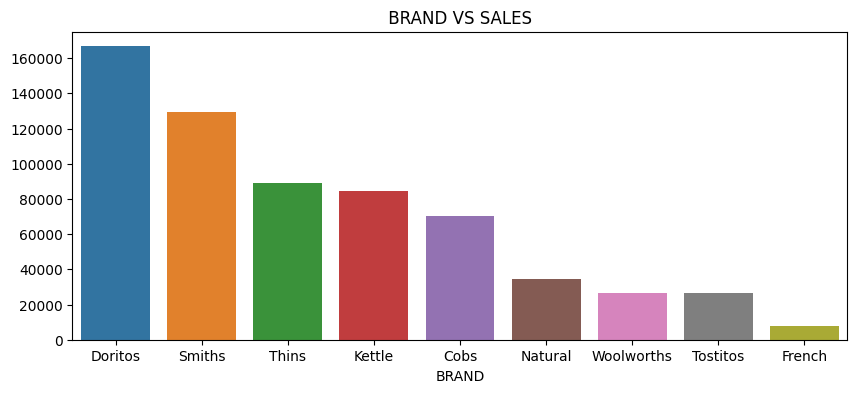

In [299]:
plt.figure(figsize=(10,4))
sns.barplot(x=topbrand.index,y=topbrand.values)
plt.title(' BRAND VS SALES ')

ABOVE VISUALIZATION TELL US THAT MOST SALES ARE CAUSE OF DORITOS AND SMITHS 

In [300]:
#which pkt_size is mostly purchased by customers 
customer_pkt_size=filter.groupby(['PKT_SIZE'])['PKT_SIZE'].count()
customer_pkt_size

PKT_SIZE
110g     9693
150g    15956
160g     2970
170g    15413
175g    29215
200g     4473
330g     3197
380g     6416
Name: PKT_SIZE, dtype: int64

Text(0.5, 1.0, 'PKT SIZE')

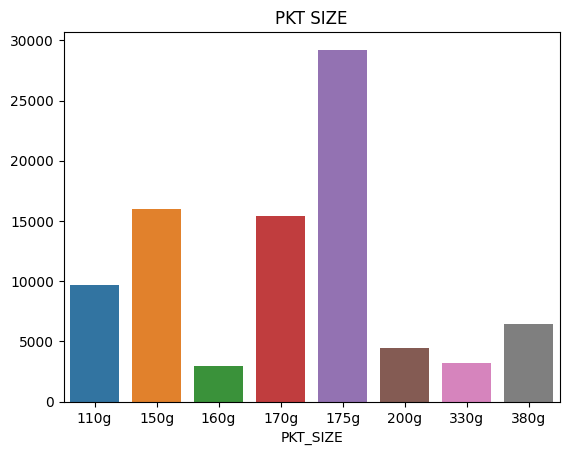

In [301]:
sns.barplot(x=customer_pkt_size.index,y=customer_pkt_size.values)
plt.title('PKT SIZE')

MOSTLY 175g OF PKT SIZE ARE PURCHASED BY CUSTOMERS 

In [302]:
# HOW PKT_SIZE,TOT_SALES AND PROD_QTY RELATED TO EACH OTHER
pkt_size=filter['PKT_SIZE'].str.extract(r'(\d+)')
pkt_size.astype(int)
corr=pd.concat([pkt_size,filter[['PROD_QTY','TOT_SALES']]],axis=1).corr()
corr.rename(columns={0: 'PKT_SIZE'}, index={0: 'PKT_SIZE'}, inplace=True)
corr

,PKT_SIZE,PROD_QTY,TOT_SALES
PKT_SIZE,1.000000,-0.000362,0.485343
PROD_QTY,-0.000362,1.000000,0.533348
TOT_SALES,0.485343,0.533348,1.000000


<Axes: >

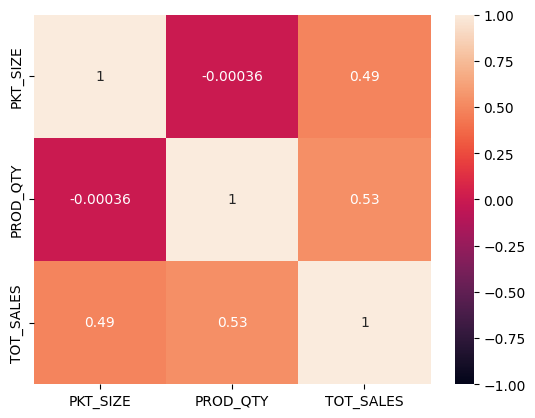

In [303]:
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

THE RELATION BETWEEN PRODUCT QUANTITY AND TOTAL SALES IS POSTIVE AND THE RELATION BETWEEN THEM IS ALSO GOOD WHICH MEANS IF SALES GOES HIGH THERE IS 50% CHANCE IT IS CAUSE OF HIGH PURCHASE OF PRODUCT QUANTITY.

PKT_SIZE is weakly related to both PROD_QTY and TOT_SALES, meaning that packet size does not have a strong direct impact on how much quantity is sold or the total sales.

        TIME BASED ANALYSIS
        

In [304]:
#how transaction vary over date
transaction=filter.groupby(['DATE'])['TOT_SALES'].sum()
transaction

DATE
2018-07-01    1436.3
2018-07-02    1688.0
2018-07-03    1732.1
2018-07-04    1651.6
2018-07-05    1753.5
               ...  
2019-06-26    1618.7
2019-06-27    1507.7
2019-06-28    1968.8
2019-06-29    1824.7
2019-06-30    1831.4
Name: TOT_SALES, Length: 364, dtype: float64

<Axes: title={'center': 'SALES VS MONTH'}, xlabel='DATE', ylabel='TOT_SALES'>

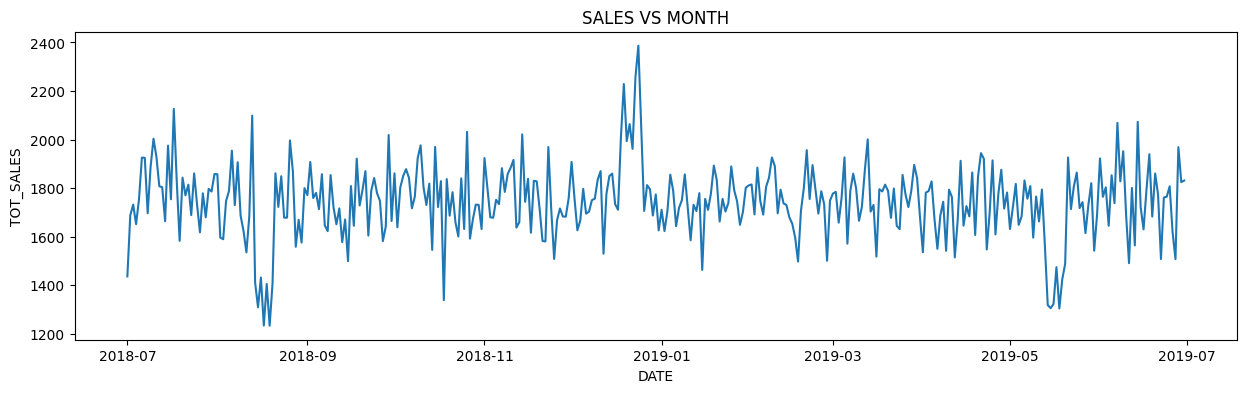

In [305]:
plt.figure(figsize=(15,4))
plt.title('SALES VS MONTH')
sns.lineplot(transaction)

From above visualization we found that there is peek sales in december months and then sudden drop let's check it why there is sudden drop.is there any date where there is no sales let's find out by analyze december month sales day by day.

In [306]:
december_data=filter[(filter['DATE']>='2018-12-01') & (filter['DATE']<='2018-12-31')]
december_sales=december_data.groupby(['DATE'])['TOT_SALES'].sum()
december_sales

DATE
2018-12-01    1907.9
2018-12-02    1758.5
2018-12-03    1626.3
2018-12-04    1666.8
2018-12-05    1797.1
2018-12-06    1694.8
2018-12-07    1703.0
2018-12-08    1750.5
2018-12-09    1756.4
2018-12-10    1835.2
2018-12-11    1870.0
2018-12-12    1529.9
2018-12-13    1775.8
2018-12-14    1849.4
2018-12-15    1859.9
2018-12-16    1734.0
2018-12-17    1710.8
2018-12-18    2011.9
2018-12-19    2228.9
2018-12-20    1993.8
2018-12-21    2063.7
2018-12-22    1961.9
2018-12-23    2257.5
2018-12-24    2386.6
2018-12-26    1706.1
2018-12-27    1812.3
2018-12-28    1795.4
2018-12-29    1687.2
2018-12-30    1774.2
2018-12-31    1626.1
Name: TOT_SALES, dtype: float64

<Axes: title={'center': 'DECEMBER SALES'}, xlabel='DATE'>

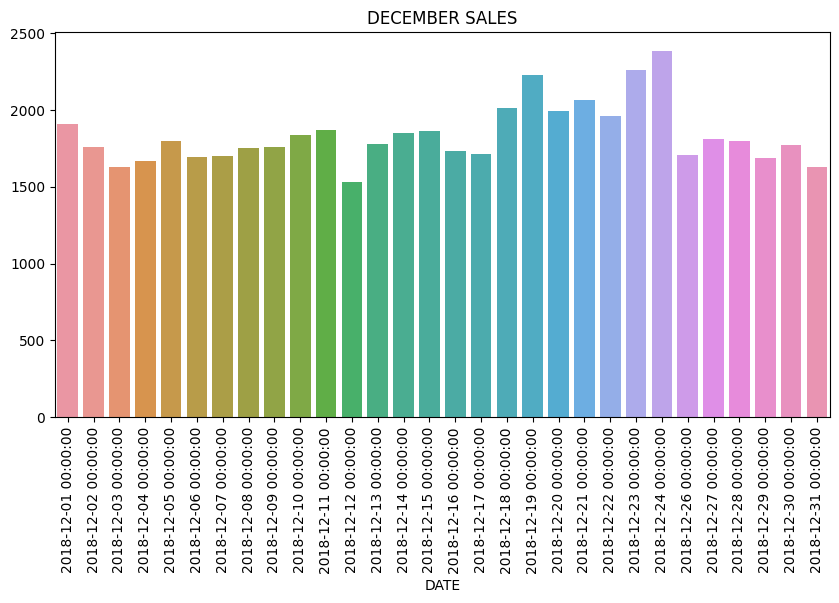

In [307]:
#visulization of december sales
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('DECEMBER SALES')
sns.barplot(x=december_sales.index,y=december_sales.values)

From above visualization we found that there is peek sale on 24 december and on 25 december shops are closed due to christmas eve that why there is sudden drop in transcation over time

In [308]:
#how sales vary for premium_customer over a weekly period
premium_customer_sales_over_month=filter.groupby([pd.Grouper(key='DATE',freq='ME'),'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
premium_customer_sales_over_month

DATE        PREMIUM_CUSTOMER
2018-07-31  Budget              19715.70
            Mainstream          21347.10
            Premium             14338.60
2018-08-31  Budget              18322.40
            Mainstream          20402.35
            Premium             12766.20
2018-09-30  Budget              17858.20
            Mainstream          20433.00
            Premium             13892.90
2018-10-31  Budget              19349.40
            Mainstream          21006.70
            Premium             14082.90
2018-11-30  Budget              18642.20
            Mainstream          20117.40
            Premium             13882.50
2018-12-31  Budget              18791.00
            Mainstream          21810.10
            Premium             14530.80
2019-01-31  Budget              18499.00
            Mainstream          21312.90
            Premium             14045.20
2019-02-28  Budget              17133.60
            Mainstream          19213.50
            Premium         

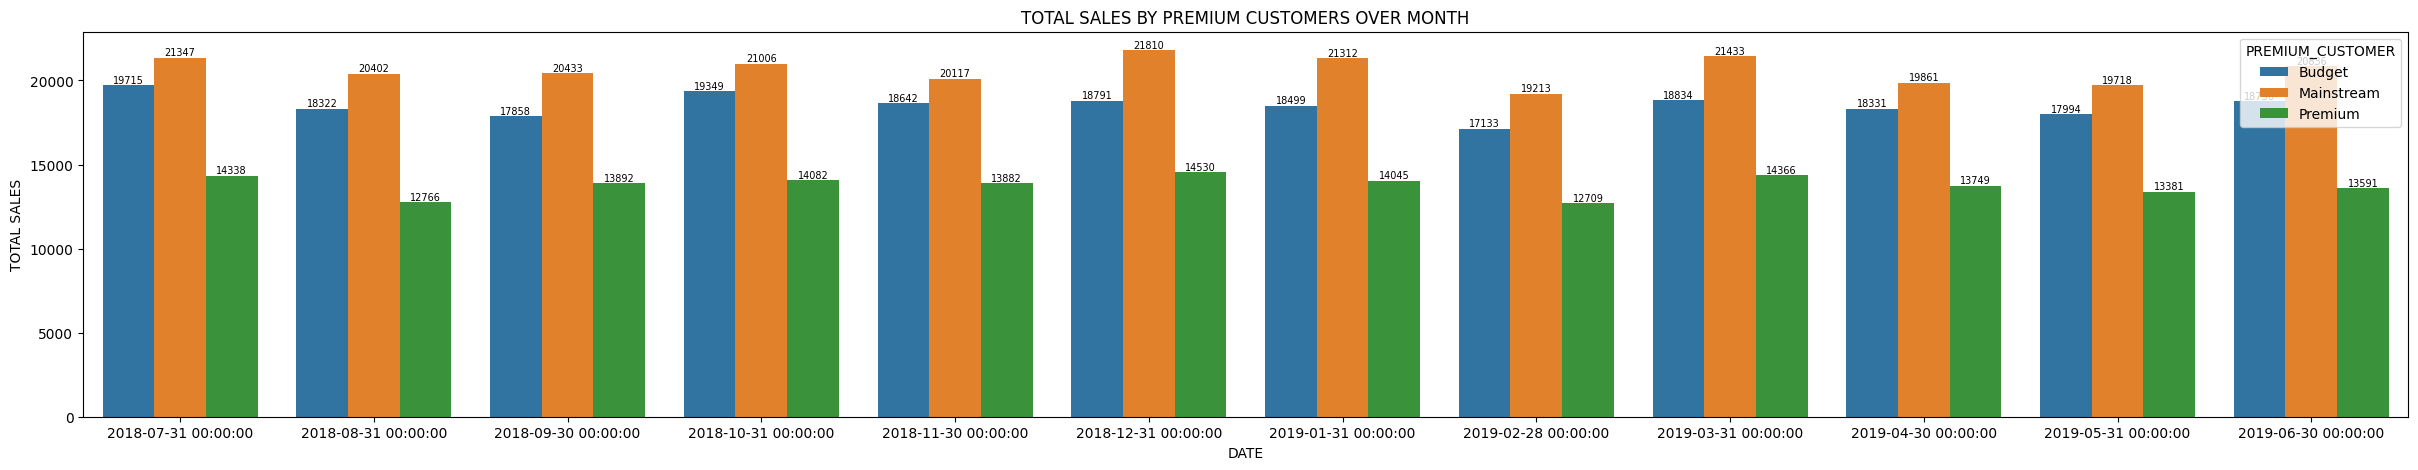

In [309]:
plt.figure(figsize=(30,5))
ax=sns.barplot(x=premium_customer_sales_over_month.index.get_level_values('DATE'),
            y=premium_customer_sales_over_month.values,
            hue=premium_customer_sales_over_month.index.get_level_values('PREMIUM_CUSTOMER'))
plt.ylabel('TOTAL SALES')
plt.title('TOTAL SALES BY PREMIUM CUSTOMERS OVER MONTH')
for x in ax.containers:
    ax.bar_label(x,fmt='%d',fontsize=7)

IN THE MONTH OF DECEMBER PREMIUM_CUSTOMER SEGMENT GENRATE THE MOST SALES MAY BE FESTIVE SEASON(NEW YEAR,CHRISTMAS) IS A REASON BEHIND IT.

In [310]:
#HOW SALE VARY FOR DIFFERENT LIFESTAGES OVER A MONTH
lifestage_total_sales_over_month=filter.groupby([pd.Grouper(key='DATE',freq='ME'),'LIFESTAGE'])['TOT_SALES'].sum()
lifestage_total_sales_over_month

DATE        LIFESTAGE             
2018-07-31  MIDAGE SINGLES/COUPLES     5556.2
            NEW FAMILIES               1281.0
            OLDER FAMILIES            10141.7
            OLDER SINGLES/COUPLES     11575.1
            RETIREES                  10351.3
                                       ...   
2019-06-30  OLDER FAMILIES             9849.4
            OLDER SINGLES/COUPLES     10815.8
            RETIREES                   9506.7
            YOUNG FAMILIES             8869.3
            YOUNG SINGLES/COUPLES      7394.8
Name: TOT_SALES, Length: 84, dtype: float64

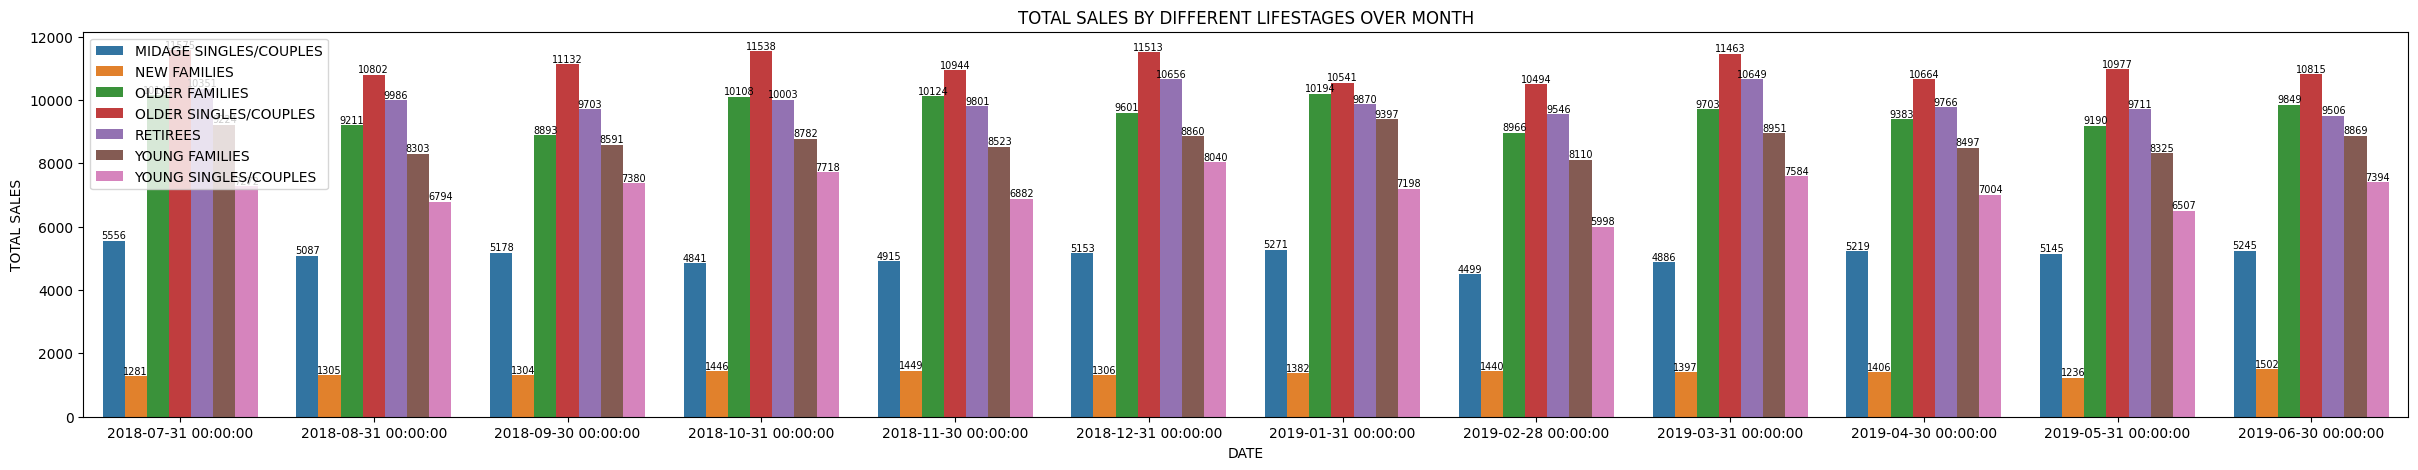

In [311]:
plt.figure(figsize=(30,5))
ax=sns.barplot(x=lifestage_total_sales_over_month.index.get_level_values('DATE'),
            y=lifestage_total_sales_over_month.values,
            hue=lifestage_total_sales_over_month.index.get_level_values('LIFESTAGE'))
plt.legend(loc='best')
plt.ylabel('TOTAL SALES')
plt.title('TOTAL SALES BY DIFFERENT LIFESTAGES OVER MONTH')

for x in ax.containers:
    ax.bar_label(x,fmt='%d',fontsize=7)


GENERALLY THE TOTAL SALES OF ALL DIFFERENT LIFESTAGE ARE ALMOST GOOD FOR ALL MONTHS BUT IN JULY AND DECEMBER THEY SHOWS MOST INTEREST.

In [312]:
#how much a premium customer order chips over a month
premium_customer_quantity_over_month=filter.groupby([pd.Grouper(key='DATE',freq='ME'),'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
premium_customer_quantity_over_month

DATE        PREMIUM_CUSTOMER
2018-07-31  Budget              5130
            Mainstream          5595
            Premium             3759
2018-08-31  Budget              4870
            Mainstream          5269
            Premium             3360
2018-09-30  Budget              4751
            Mainstream          5265
            Premium             3662
2018-10-31  Budget              5077
            Mainstream          5459
            Premium             3718
2018-11-30  Budget              4924
            Mainstream          5198
            Premium             3660
2018-12-31  Budget              5030
            Mainstream          5652
            Premium             3799
2019-01-31  Budget              4844
            Mainstream          5484
            Premium             3719
2019-02-28  Budget              4473
            Mainstream          4985
            Premium             3313
2019-03-31  Budget              5017
            Mainstream          5506
         

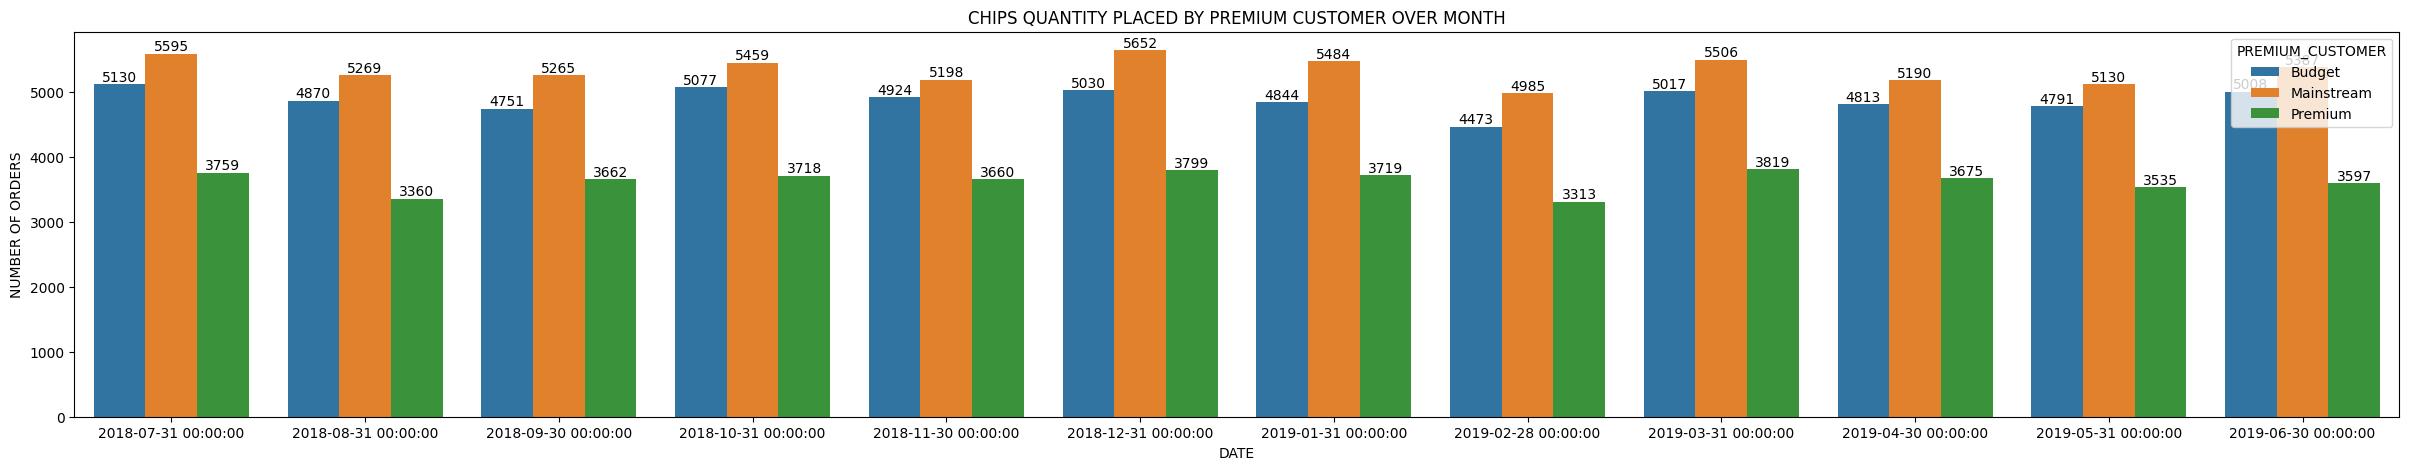

In [313]:
plt.figure(figsize=(30,5))
ax=sns.barplot(x=premium_customer_quantity_over_month.index.get_level_values('DATE'),
               y=premium_customer_quantity_over_month.values,
               hue=premium_customer_quantity_over_month.index.get_level_values('PREMIUM_CUSTOMER'))
plt.ylabel('NUMBER OF ORDERS')
plt.title('CHIPS QUANTITY PLACED BY PREMIUM CUSTOMER OVER MONTH')
for x in ax.containers:
    ax.bar_label(x,fmt='%d')

IN THE MONTHS OF DECEMBER,JULY,MARCH,JANUARY AND MARCH ALL CATEGORY OF PREMIUM CUSTOMER PLACE THE ORER IN LARGE QUANTITY MOSTLY IN DECEMBER CAUSE OF CHRISTMAS,NEW YEAR OR SOMETHING ELSE.

In [314]:
# Total quantity purchased by different lifestages over a month 
lifestage_quantity_placed=filter.groupby([pd.Grouper(key='DATE',freq='ME'),'LIFESTAGE'])['PROD_QTY'].sum()
lifestage_quantity_placed

DATE        LIFESTAGE             
2018-07-31  MIDAGE SINGLES/COUPLES    1441
            NEW FAMILIES               322
            OLDER FAMILIES            2749
            OLDER SINGLES/COUPLES     2993
            RETIREES                  2664
                                      ... 
2019-06-30  OLDER FAMILIES            2633
            OLDER SINGLES/COUPLES     2855
            RETIREES                  2469
            YOUNG FAMILIES            2365
            YOUNG SINGLES/COUPLES     1902
Name: PROD_QTY, Length: 84, dtype: int64

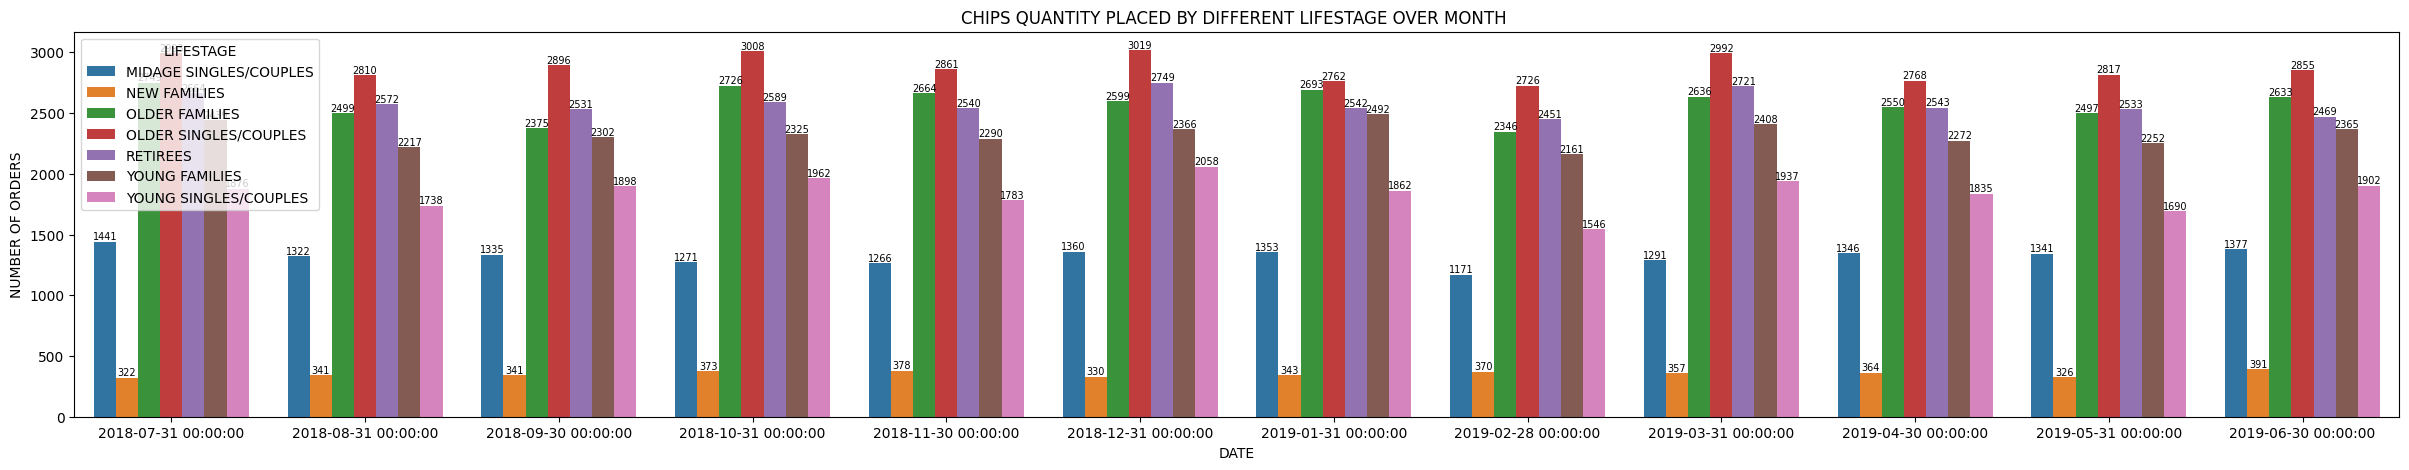

In [315]:
plt.figure(figsize=(30,5))
ax=sns.barplot(x=lifestage_quantity_placed.index.get_level_values('DATE'),
              y=lifestage_quantity_placed.values,
              hue=lifestage_quantity_placed.index.get_level_values('LIFESTAGE'))
plt.ylabel('NUMBER OF ORDERS')
plt.title('CHIPS QUANTITY PLACED BY DIFFERENT LIFESTAGE OVER MONTH ')
for x in ax.containers:
    ax.bar_label(x,fmt='%d',fontsize=7)

IN THE MONTH OF DECEMBER ALL DIFFERENT LIFESTAGE ORDER CHIPS IN HIGH QUANTITY COMPARE TO OTHER MONTHS AND ALSO HIGH AMOUNT OF ORDER IS PLACED IN MARCH,OCTOBER AND JULY

In [316]:
#which brand is mostly order in each month
brand_over_month=filter.groupby([pd.Grouper(key='DATE',freq='ME'),'BRAND'])['BRAND'].value_counts()
brand_over_month

DATE        BRAND     
2018-07-31  Cobs           778
            Doritos       1675
            French         125
            Kettle         831
            Natural        491
                          ... 
2019-06-30  Natural        538
            Smiths        1388
            Thins         1171
            Tostitos       273
            Woolworths     603
Name: count, Length: 108, dtype: int64

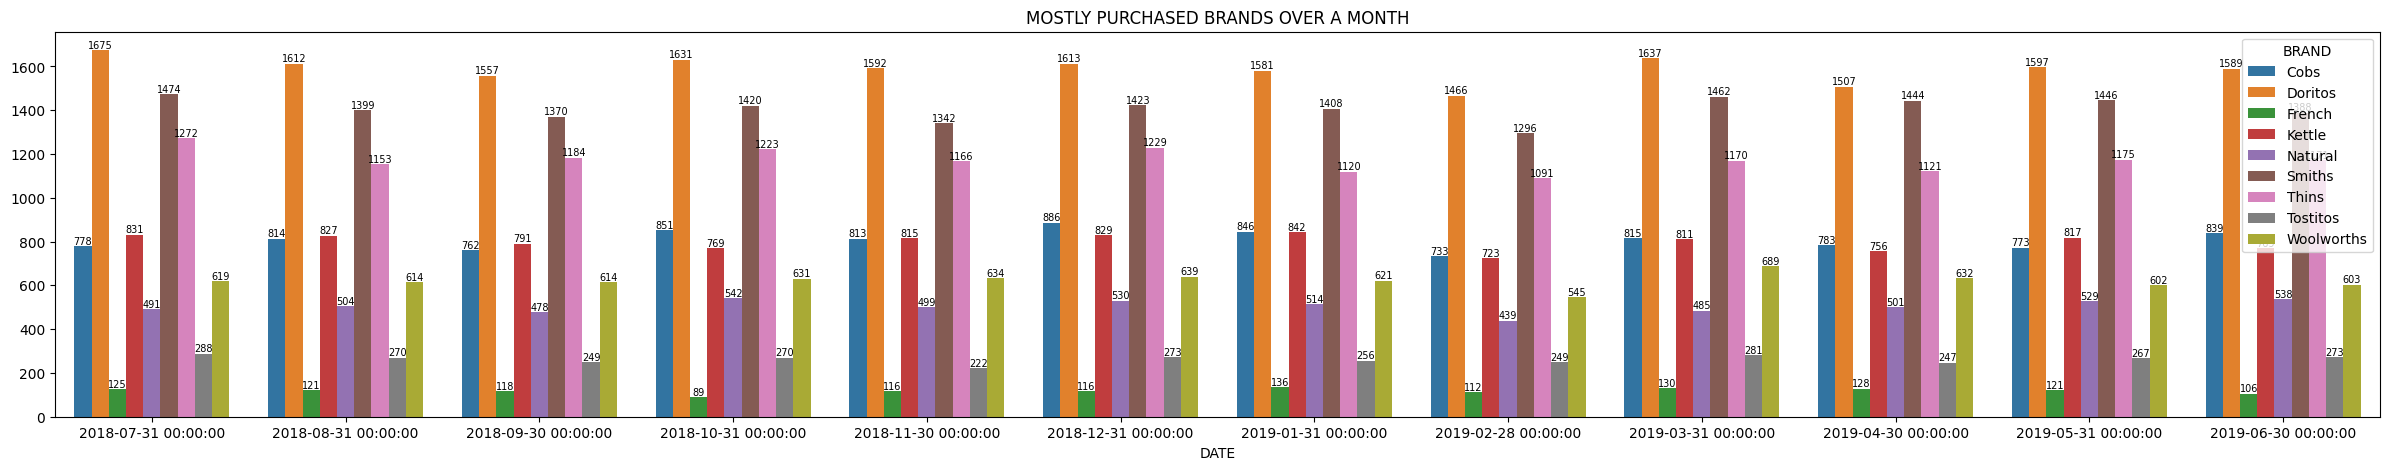

In [317]:
plt.figure(figsize=(30,5))
ax=sns.barplot(x=brand_over_month.index.get_level_values('DATE'),
            y=brand_over_month.values,
            hue=brand_over_month.index.get_level_values('BRAND')
           )
plt.title('MOSTLY PURCHASED BRANDS OVER A MONTH')
for x in ax.containers:
    ax.bar_label(x,fmt='%d',fontsize=7)

IN EACH MONTH SMITHS AND DARITOS ARE MOSTLY PURCHASED CHIPS BRAND AMONG ALL BRANDS AND LEAST PURCHASED BRANDS ARE FRENCH AND TOSTISTOS 

In [318]:
#which pkt_size is mostly orderded over month
pkt_size_placed_over_month=filter.groupby([pd.Grouper(key='DATE',freq='ME'),'PKT_SIZE'])['PROD_QTY'].sum()
pkt_size_placed_over_month

DATE        PKT_SIZE
2018-07-31  110g        1493
            150g        2736
            160g         495
            170g        2551
            175g        4926
                        ... 
2019-06-30  170g        2478
            175g        4727
            200g         741
            330g         493
            380g         970
Name: PROD_QTY, Length: 96, dtype: int64

Text(0.5, 1.0, 'TOTAL ORDERS OF DIFFERENT PKT SIZE OVER MONTH')

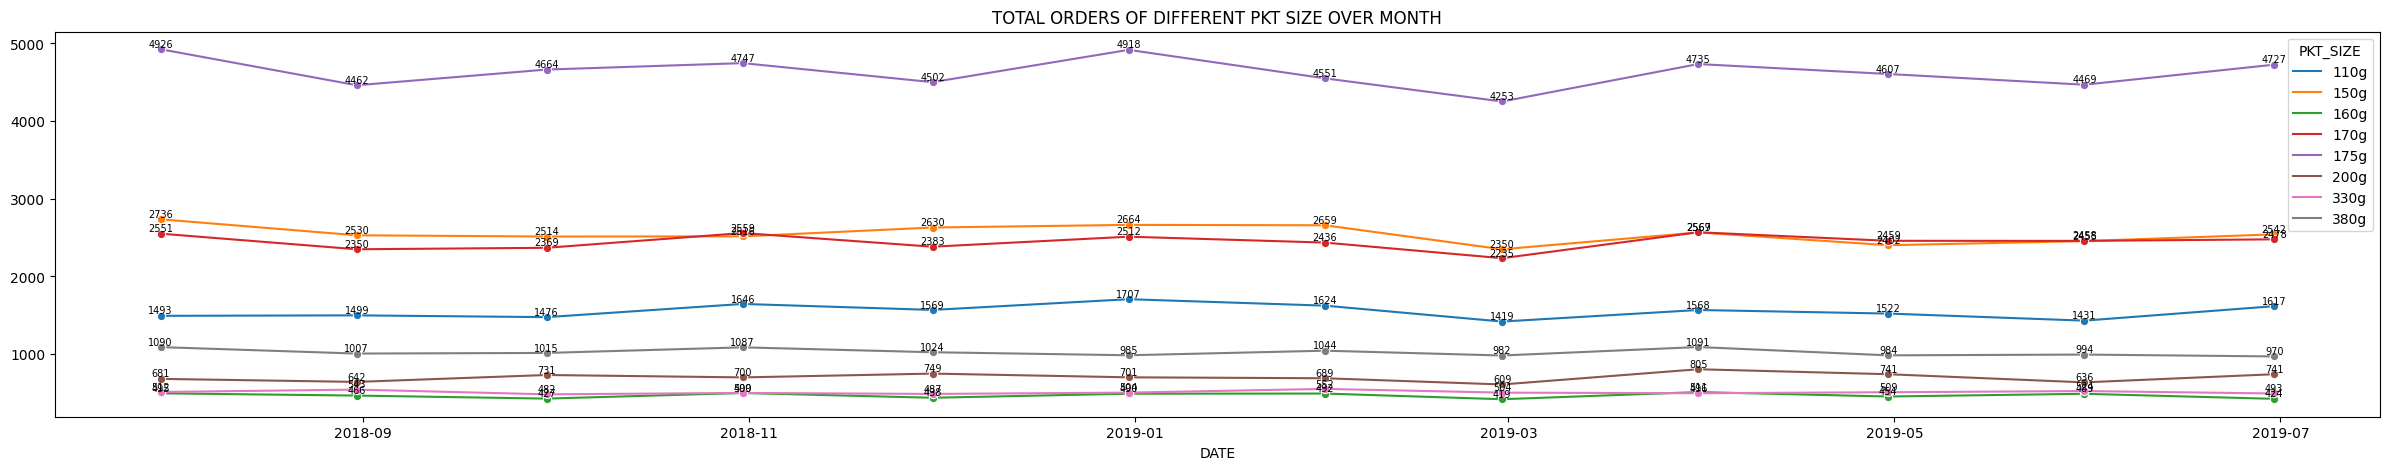

In [319]:
plt.figure(figsize=(30,5))
ax=sns.lineplot(x=pkt_size_placed_over_month.index.get_level_values('DATE'),
                y=pkt_size_placed_over_month.values,
                hue=pkt_size_placed_over_month.index.get_level_values('PKT_SIZE'),
                marker='o'
               )

for x, y in zip(pkt_size_placed_over_month.index.get_level_values('DATE'), pkt_size_placed_over_month.values):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=7)
plt.title('TOTAL ORDERS OF DIFFERENT PKT SIZE OVER MONTH')


TIME BASED ANALYSIS CONCLUSION:

WE FOUND THAT IN MONTHS OF DECEMBER,JULY,MARCH,JANUARY THERE IS MOST SALES,HIGH QUANTITY ORDER, DARITOS AND SMITHS BRAND SALES ALSO GO HIGH IN THESE MONTHS.


                                                        FINAL CONCLUSION:
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream -retirees shoppers.
We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips like 175g,150g,170g in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour in the months of december,july,march and january.
